Este colab fue desarrollado por Arnold Charry Armero.

# Naïve Bayes con Procesamiento de Lenguaje Natural (NLP)

 Naïve Bayes es un algoritmo de clasificación inspirado en el Teorema de Bayes, pero que se diferencia de este en que no toma a las características $x_{i}$ como dependientes entre sí, sino que más bien las asume como independientes con la finalidad de disminuir la complejidad computacional de los cálculos. Por está razón, se le conoce como Naïve, que en español se traduce como ingenuo. No obstante, los resultados de este algoritmo en bases de datos son muy buenos. Se emplea el Procesamiento de Lenguaje Natural (NLP) junto a este algoritmo para clasificar si un correo es spam o no es spam. O también para el ámbito de la medicina, si se tiene una enfermedad dadas varias características o no. Es un algoritmo muy completo, prometedor y fundamental en el campo del Machine Learning. Maneja principalmente variables categóricas, pero también variables númericas. Las númericas las maneja con una distribución de probabilidad, ya sea la normal, la bernoulli, la poisson, etc. El cálculo de la probabilidad condicional se define con la siguiente expresión matemática:


$$ P\left(y_j \mid x_{1}, \dots, x_{n}\right) \;=\; \frac{P(y_j)\,\prod_{i=1}^{n} P\!\left(x_i \mid y_j\right)}{P(x_{1}, \dots, x_{n})}$$


Cuando se le pide que clasifique una observación nueva, calcula la probabilidad condicional de que esa observación pertenezca a cada clase. Luego, las compara y la clase que haya obteniedo la probabilidad condicional más alta, es la seleccionada para clasificar aquella observación.

En este colab se utiliza Multinomial Naïve Bayes, el cual básicamente cuenta la frecuencia con la que aparece una palabra en un conjunto de documentos como base de datos de entrenamiento y también cuenta las etiquetas que tenga cada uno de los documentos del conjunto de entrenamiento. De esta manera, obtiene las probabilidades normales y condicionales para luego aplicar el Teorema de Bayes asumiendo que las palabras son independientes entre sí.

**Nota:** Si se utiliza Multinomial Naïve Bayes, todas las características deben ser texto o categorías.

In [ ]:
# Se importan las librerias
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, ConfusionMatrixDisplay

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Machine Learning/Bases de Datos/Tweets.csv', sep = ',')

In [ ]:
df.head()

,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,airline_sentiment_gold,name,negativereason_gold,retweet_count,text,tweet_coord,tweet_created,tweet_location,user_timezone
0,570306133677760513,neutral,1.0000,NaN,NaN,Virgin America,NaN,cairdin,NaN,0,@VirginAmerica What @dhepburn said.,NaN,2015-02-24 11:35:52 -0800,NaN,Eastern Time (US & Canada)
1,570301130888122368,positive,0.3486,NaN,0.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica plus you've added commercials t...,NaN,2015-02-24 11:15:59 -0800,NaN,Pacific Time (US & Canada)
2,570301083672813571,neutral,0.6837,NaN,NaN,Virgin America,NaN,yvonnalynn,NaN,0,@VirginAmerica I didn't today... Must mean I n...,NaN,2015-02-24 11:15:48 -0800,Lets Play,Central Time (US & Canada)
3,570301031407624196,negative,1.0000,Bad Flight,0.7033,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica it's really aggressive to blast...,NaN,2015-02-24 11:15:36 -0800,NaN,Pacific Time (US & Canada)
4,570300817074462722,negative,1.0000,Can't Tell,1.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica and it's a really big bad thing...,NaN,2015-02-24 11:14:45 -0800,NaN,Pacific Time (US & Canada)


## Análisis Exploratorio de Datos (EDA)

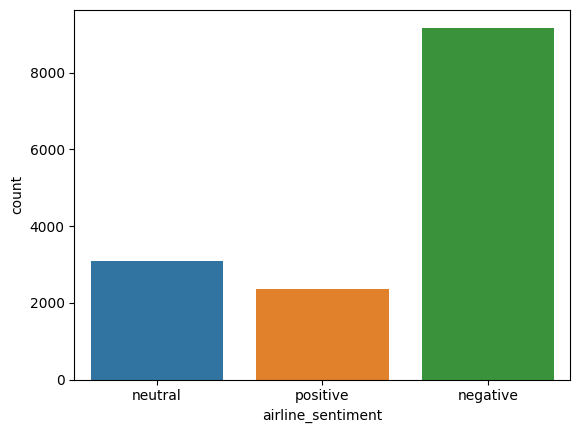

In [ ]:
sns.countplot(data = df, x = 'airline_sentiment', hue = 'airline_sentiment')
plt.show()

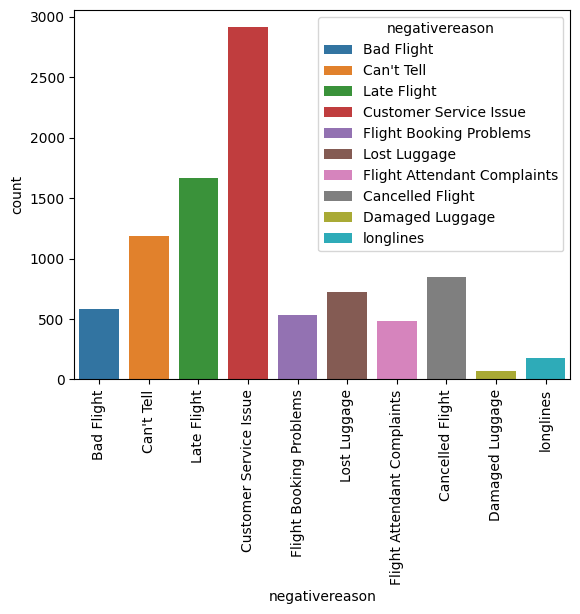

In [ ]:
sns.countplot(data = df, x = 'negativereason', hue = 'negativereason')
plt.xticks(rotation = 90)
plt.show()

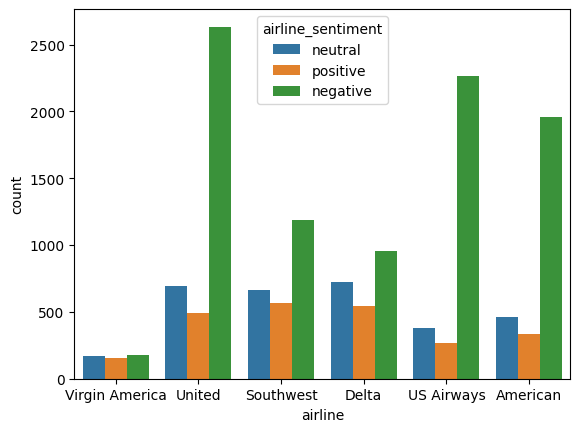

In [ ]:
sns.countplot(data = df, x = 'airline', hue = 'airline_sentiment')
plt.show()

In [ ]:
data = df[['text', 'airline_sentiment']]
display(data)

,text,airline_sentiment
0,@VirginAmerica What @dhepburn said.,neutral
1,@VirginAmerica plus you've added commercials t...,positive
2,@VirginAmerica I didn't today... Must mean I n...,neutral
3,@VirginAmerica it's really aggressive to blast...,negative
4,@VirginAmerica and it's a really big bad thing...,negative
...,...,...
14635,@AmericanAir thank you we got on a different f...,positive
14636,@AmericanAir leaving over 20 minutes Late Flig...,negative
14637,@AmericanAir Please bring American Airlines to...,neutral
14638,"@AmericanAir you have my money, you change my ...",negative


In [ ]:
# Obtenemos las características y etiquetas
X = data['text']
y = data['airline_sentiment']

## Separación en Base de datos de Entrenamiento y Prueba

In [ ]:
# Se divide la base de datos
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 101)

## Preprocesamiento de Datos

In [ ]:
tfidf = TfidfVectorizer(stop_words = 'english')
X_train = tfidf.fit_transform(X_train)
X_test = tfidf.transform(X_test)

## Entrenamiento del Modelo

Ahora vamos con el modelo Naïve Bayes con sus predicciones,

In [ ]:
NB_model = MultinomialNB()

In [ ]:
NB_model.fit(X_train, y_train)

MultinomialNB()

In [ ]:
# Obtenemos las predicciones
y_pred = NB_model.predict(X_test)
print(y_pred.reshape(len(y_pred),1))

[['positive']
 ['negative']
 ['negative']
 ...
 ['negative']
 ['negative']
 ['negative']]


## Rendimiento del Modelo

In [ ]:
# Obteniendo la precisión del modelo
print('Accuracy:', accuracy_score(y_test, y_pred))

Accuracy: 0.673155737704918


In [ ]:
# Matriz de confusión
confusion_matrix(y_test,y_pred)

array([[1807,    9,    1],
       [ 524,   97,    7],
       [ 399,   17,   67]])

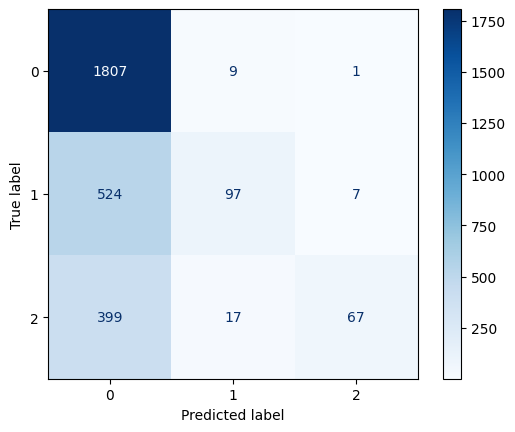

In [ ]:
# Visualizando la matriz de confusión
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap=plt.cm.Blues, values_format='d')
plt.show()

In [ ]:
# Obteniendo el reporte de clasificación
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

    negative       0.66      0.99      0.79      1817
     neutral       0.79      0.15      0.26       628
    positive       0.89      0.14      0.24       483

    accuracy                           0.67      2928
   macro avg       0.78      0.43      0.43      2928
weighted avg       0.73      0.67      0.59      2928



## Validación Cruzada

Se mide el accuracy para la diferente selección de datos de entrenamiento y prueba,

In [ ]:
# Aplicar K-fold Cross Validation
accuracies = cross_val_score(estimator = NB_model, X = X_train, y = y_train, cv = 10, scoring = 'accuracy')
print(accuracies.mean())

0.6858779287852336


## Referencias

*   Jacinto, V. R. (2024). Machine learning: Fundamentos, algoritmos y aplicaciones para los negocios, industria y finanzas. Ediciones Díaz de Santos.
*   Lantz, B. (2019). Machine Learning with R: Expert techniques for predictive modeling. Packt Publishing Ltd.
*   Twitter US Airline sentiment. (2019, October 16). Kaggle. https://www.kaggle.com/datasets/crowdflower/twitter-airline-sentiment